Recurrent Neural Networks, or RNNs for short, are designed to operate upon sequences of data.

They have proven to be very effective for natural language processing problems where sequences of text are provided as input to the model. RNNs have also seen some modest success for time series forecasting and speech recognition.

The most popular type of RNN is the Long Short-Term Memory network, or LSTM for short. LSTMs can be used in a model to accept a sequence of input data and make a prediction, such as assign a class label or predict a numerical value like the next value or values in the sequence.

We will use the car sales dataset to demonstrate an LSTM RNN for univariate time series forecasting.

This problem involves predicting the number of car sales per month.

We will frame the problem to take a window of the last five months of data to predict the current month’s data.

To achieve this, we will define a new function named split_sequence() that will split the input sequence into windows of data appropriate for fitting a supervised learning model, like an LSTM.

For example, if the sequence was:

```
1, 2, 3, 4, 5, 6, 7, 8, 9, 10
```

Then the samples for training the model will look like:

```
Input 				Output
1, 2, 3, 4, 5 		6
2, 3, 4, 5, 6 		7
3, 4, 5, 6, 7 		8
```

In [25]:
# lstm for time series forecasting
from numpy import sqrt
from numpy import asarray
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
 
# split a univariate sequence into samples

#X: previous 5 elements values from a element 
#y: an element i on the time series 
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x) # each element of X is a list of n_steps values. 
		y.append(seq_y) # each element of y is a single value
	return asarray(X), asarray(y)
 
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0, index_col=0, squeeze=True)
# retrieve the values
print(df)


C:\Users\kinla\AppData\Local\Temp\ipykernel_7092\596415183.py:29: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = read_csv(path, header=0, index_col=0, squeeze=True)


Month
1960-01     6550
1960-02     8728
1960-03    12026
1960-04    14395
1960-05    14587
           ...  
1968-08    16722
1968-09    14385
1968-10    21342
1968-11    17180
1968-12    14577
Name: Sales, Length: 108, dtype: int64


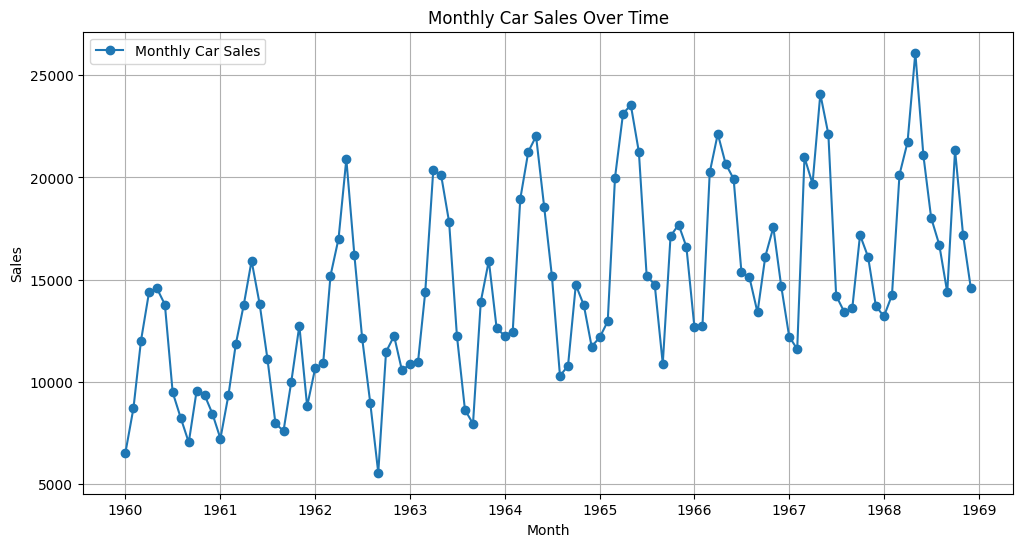

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the index to datetime for better plotting
df.index = pd.to_datetime(df.index)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df.values, label='Monthly Car Sales', marker='o', linestyle='-')
plt.title('Monthly Car Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()






In [3]:
print(len(df.index))
print(df.index)

108
DatetimeIndex(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01',
               ...
               '1968-03-01', '1968-04-01', '1968-05-01', '1968-06-01',
               '1968-07-01', '1968-08-01', '1968-09-01', '1968-10-01',
               '1968-11-01', '1968-12-01'],
              dtype='datetime64[ns]', name='Month', length=108, freq=None)


In [4]:
values = df.values.astype('float32')
# specify the window size
n_steps = 5
# split into samples
X, y = split_sequence(values, n_steps)

# Show some examples of X and y:
print(f"The 10th element of X: {X[10]}")
print(f"The 10th element of y: {y[10]}")
print("We can see that each X is matching to the next position in the chart.")


print(f"X: {X}")
print(f"There are {len(X)} element in X")

print(f"y: {y}")
print(f"There are {len(y)} element in y")



The 10th element of X: [ 9364.  8456.  7237.  9374. 11837.]
The 10th element of y: 13784.0
We can see that each X is matching to the next position in the chart.
X: [[ 6550.  8728. 12026. 14395. 14587.]
 [ 8728. 12026. 14395. 14587. 13791.]
 [12026. 14395. 14587. 13791.  9498.]
 [14395. 14587. 13791.  9498.  8251.]
 [14587. 13791.  9498.  8251.  7049.]
 [13791.  9498.  8251.  7049.  9545.]
 [ 9498.  8251.  7049.  9545.  9364.]
 [ 8251.  7049.  9545.  9364.  8456.]
 [ 7049.  9545.  9364.  8456.  7237.]
 [ 9545.  9364.  8456.  7237.  9374.]
 [ 9364.  8456.  7237.  9374. 11837.]
 [ 8456.  7237.  9374. 11837. 13784.]
 [ 7237.  9374. 11837. 13784. 15926.]
 [ 9374. 11837. 13784. 15926. 13821.]
 [11837. 13784. 15926. 13821. 11143.]
 [13784. 15926. 13821. 11143.  7975.]
 [15926. 13821. 11143.  7975.  7610.]
 [13821. 11143.  7975.  7610. 10015.]
 [11143.  7975.  7610. 10015. 12759.]
 [ 7975.  7610. 10015. 12759.  8816.]
 [ 7610. 10015. 12759.  8816. 10677.]
 [10015. 12759.  8816. 10677. 10947.]


# reshape into [samples, timesteps, features]

`LSTM networks in Keras expect input data to be in the form of a three-dimensional array with these dimensions. 
This is because LSTM networks are designed to take sequences of data as input, 
where each sequence consists of multiple time steps, and each time step has one or more features.`

Example:

```python
import numpy as np

# Example 2D array
X = np.array([[1, 2], [3, 4]])

# Reshape to 3D array
Y = X.reshape((X.shape[0], X.shape[1], 1))

# Output
print(Y)
```

Result:
```python
array([[[1],
        [2]],

       [[3],
        [4]]])
```


The method would stack 2D arrays in the third dimension. 



In [5]:
print(X.shape)
X = X.reshape((X.shape[0], X.shape[1], 1))
print(X.shape)

(103, 5)
(103, 5, 1)


In [6]:
# split into train/test
n_test = 12
# '-n_test' : it means 'last 12'. X[:-n_test] return 91 values. 
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:] 
# because the size of X and y is not equal, so we truncate X and y to make them equal length.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(91, 5, 1) (12, 5, 1) (91,) (12,)


Epoch 1/350


3/3 - 1s - loss: 757783936.0000 - mae: 23081.0117 - val_loss: 145764304.0000 - val_mae: 9038.2861 - 1s/epoch - 400ms/step
Epoch 2/350
3/3 - 0s - loss: 122846712.0000 - mae: 8326.2363 - val_loss: 187237200.0000 - val_mae: 12460.7969 - 35ms/epoch - 12ms/step
Epoch 3/350
3/3 - 0s - loss: 143924736.0000 - mae: 10128.1475 - val_loss: 234138000.0000 - val_mae: 12201.3594 - 36ms/epoch - 12ms/step
Epoch 4/350
3/3 - 0s - loss: 142473648.0000 - mae: 10178.1191 - val_loss: 157466880.0000 - val_mae: 10605.6133 - 42ms/epoch - 14ms/step
Epoch 5/350
3/3 - 0s - loss: 99169344.0000 - mae: 8070.7622 - val_loss: 106772968.0000 - val_mae: 8805.1006 - 33ms/epoch - 11ms/step
Epoch 6/350
3/3 - 0s - loss: 60032604.0000 - mae: 6096.8105 - val_loss: 90817768.0000 - val_mae: 8581.3955 - 33ms/epoch - 11ms/step
Epoch 7/350
3/3 - 0s - loss: 54348360.0000 - mae: 6050.4375 - val_loss: 81002056.0000 - val_mae: 7796.6919 - 33ms/epoch - 11ms/step
Epoch 8/350
3/3 - 0s - loss: 39083764.0000 - mae: 5082.3306 - val_loss: 10

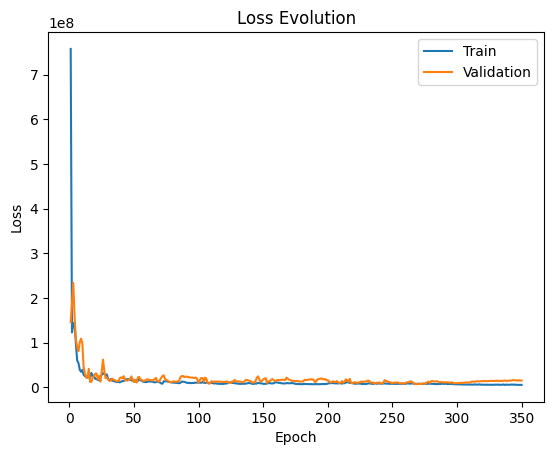

Accuracy: 3174.273


In [7]:
# define model
model = Sequential()
# the input shape is (n_steps, X_train.shape[2]) = (5, 1).
# the LSTM requires 3D input, so we add a new dimension.
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', 
               input_shape=(n_steps,X_train.shape[2])))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

# compile the model
# 'mse': it is more a regression problem, so we use mse. 
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

from keras.callbacks import History  # Import History callback

# fit the model
history = History()
model.fit(X_train, y_train, epochs=350, batch_size=32, 
          verbose=2, validation_data=(X_test, y_test), callbacks=[history],)

# evaluate the model (optional)
# Get the recorded loss values from history
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the loss values
ax.plot(range(1, len(loss_values) + 1), loss_values)
ax.plot(range(1, len(val_loss_values) + 1), val_loss_values)
plt.legend(['Train', 'Validation'], loc='upper right')

# Set the plot title and labels
ax.set_title('Loss Evolution')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Show the plot
plt.show()

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

## Predict one next day

In [8]:
# evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

# make a prediction
row = asarray([18024.0, 16722.0, 14385.0, 21342.0, 17180.0]).reshape((1, n_steps, 1)) # the input size and shape must match the training data (X_train)
yhat = model.predict(row)
print('Predicted: %.3f' % (yhat))



MSE: 14970245.000, RMSE: 3869.140, MAE: 3174.273
1/1 [==============================] - 0s 321ms/step
Predicted: 17829.670


C:\Users\kinla\AppData\Local\Temp\ipykernel_7092\2454137217.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted: %.3f' % (yhat))


## Predict n next days

In [9]:
yhat2 = model.predict(X_test)
print(yhat2) # total 12 predicted values 

1/1 [==============================] - 0s 34ms/step
[[11736.43 ]
 [14671.606]
 [16693.205]
 [21134.156]
 [21064.14 ]
 [29616.988]
 [16173.926]
 [15097.752]
 [17691.057]
 [18225.484]
 [22623.047]
 [17829.67 ]]


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# assuming y_train and yhat2 are numpy arrays and df is a DataFrame object
y_train = y_train.tolist()

# flatten yhat2 values
yhat2 = [item for sublist in yhat2 for item in sublist]

# get the x_values for each part
# `n_steps = 5` (context window was 5)
x_values_train = df.index[-(len(y_train) + len(yhat2)):-len(yhat2)] # get the another last 91 items 
x_values_pred = df.index[-len(yhat2):] # get the last 12 itesm from df.index

# create DataFrames with lists
df_train = pd.DataFrame(y_train, index=x_values_train, columns=['Y'])
df_pred = pd.DataFrame(yhat2, index=x_values_pred, columns=['Y'])

print(df_train)
print(df_pred)0

                  Y
Month              
1960-06-01  13791.0
1960-07-01   9498.0
1960-08-01   8251.0
1960-09-01   7049.0
1960-10-01   9545.0
...             ...
1967-08-01  13434.0
1967-09-01  13598.0
1967-10-01  17187.0
1967-11-01  16119.0
1967-12-01  13713.0

[91 rows x 1 columns]
                       Y
Month                   
1968-01-01  11736.429688
1968-02-01  14671.606445
1968-03-01  16693.205078
1968-04-01  21134.156250
1968-05-01  21064.140625
1968-06-01  29616.988281
1968-07-01  16173.925781
1968-08-01  15097.751953
1968-09-01  17691.056641
1968-10-01  18225.484375
1968-11-01  22623.046875
1968-12-01  17829.669922


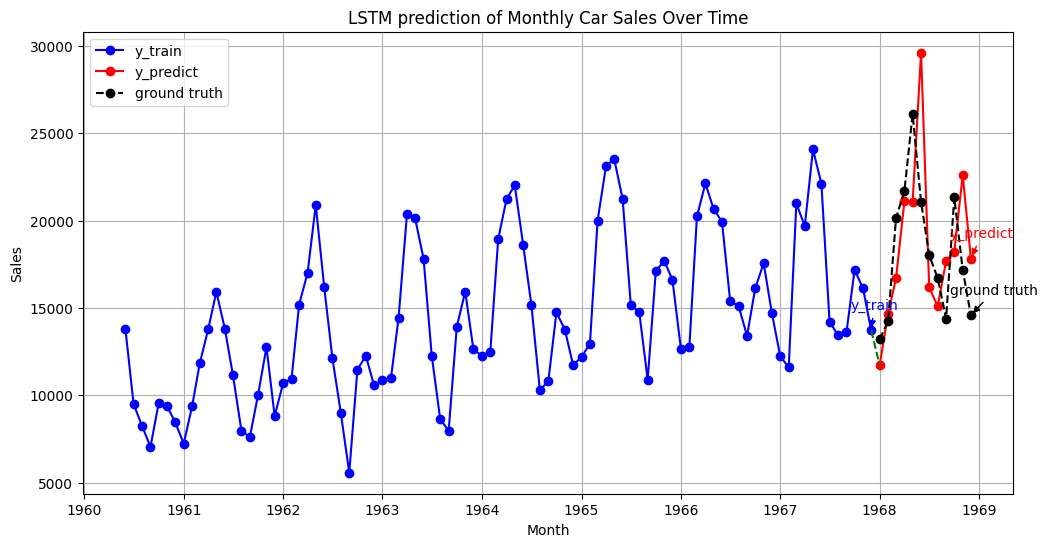

In [11]:
# Plotting
plt.figure(figsize=(12, 6))

# plot y_train
plt.plot(df_train.index, df_train.values, color='b', label='y_train', marker='o', linestyle='-')

# plot yhat2
plt.plot(df_pred.index, df_pred.values, color='r', label='y_predict', marker='o', linestyle='-')

# plot connection between last y_train and first y_predict
plt.plot([df_train.index[-1], df_pred.index[0]], [df_train.values[-1], df_pred.values[0]], color='g', linestyle='--')

# plot df in black dotted line
plt.plot(df.index[-len(yhat2):], df.values[-len(yhat2):], color='k', label='ground truth', marker='o', linestyle='--')

# annotations
plt.annotate('y_train', xy=(df_train.index[-1], df_train.values[-1]), xytext=(-15,15), 
             textcoords='offset points', color='b', arrowprops=dict(arrowstyle='-|>', color='b'))

plt.annotate('y_predict', xy=(df_pred.index[-1], df_pred.values[-1]), xytext=(-15,15), 
             textcoords='offset points', color='r', arrowprops=dict(arrowstyle='-|>', color='r'))

plt.annotate('ground truth', xy=(df.index[-1], df.values[-1]), xytext=(-15,15), 
             textcoords='offset points', color='k', arrowprops=dict(arrowstyle='-|>', color='k'))


plt.title('LSTM prediction of Monthly Car Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

## Try again with randomSearch()

In [12]:
# lstm for time series forecasting
from numpy import sqrt
from numpy import asarray
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
 
# split a univariate sequence into samples

#X: previous 5 elements values from a element 
#y: an element i on the time series 
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x) # each element of X is a list of n_steps values. 
		y.append(seq_y) # each element of y is a single value
	return asarray(X), asarray(y)
 
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0, index_col=0, squeeze=True)
# retrieve the values


C:\Users\kinla\AppData\Local\Temp\ipykernel_7092\3846874726.py:29: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = read_csv(path, header=0, index_col=0, squeeze=True)


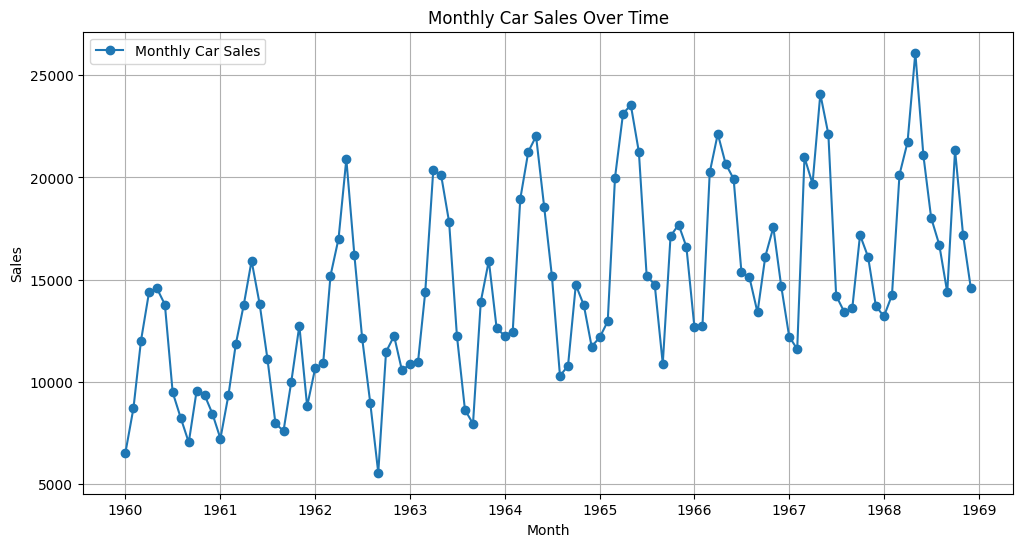

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the index to datetime for better plotting
df.index = pd.to_datetime(df.index)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df.values, label='Monthly Car Sales', marker='o', linestyle='-')
plt.title('Monthly Car Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
print(len(df.index))
print(df.index)

108
DatetimeIndex(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01',
               ...
               '1968-03-01', '1968-04-01', '1968-05-01', '1968-06-01',
               '1968-07-01', '1968-08-01', '1968-09-01', '1968-10-01',
               '1968-11-01', '1968-12-01'],
              dtype='datetime64[ns]', name='Month', length=108, freq=None)


In [15]:
values = df.values.astype('float32')
# specify the window size
n_steps = 5
# split into samples
X, y = split_sequence(values, n_steps)

# Show some examples of X and y:
print(f"The 10th element of X: {X[10]}")
print(f"The 10th element of y: {y[10]}")
print("We can see that each X is matching to the next position in the chart.")


print(f"X: {X}")
print(f"There are {len(X)} element in X")

print(f"y: {y}")
print(f"There are {len(y)} element in y")



The 10th element of X: [ 9364.  8456.  7237.  9374. 11837.]
The 10th element of y: 13784.0
We can see that each X is matching to the next position in the chart.
X: [[ 6550.  8728. 12026. 14395. 14587.]
 [ 8728. 12026. 14395. 14587. 13791.]
 [12026. 14395. 14587. 13791.  9498.]
 [14395. 14587. 13791.  9498.  8251.]
 [14587. 13791.  9498.  8251.  7049.]
 [13791.  9498.  8251.  7049.  9545.]
 [ 9498.  8251.  7049.  9545.  9364.]
 [ 8251.  7049.  9545.  9364.  8456.]
 [ 7049.  9545.  9364.  8456.  7237.]
 [ 9545.  9364.  8456.  7237.  9374.]
 [ 9364.  8456.  7237.  9374. 11837.]
 [ 8456.  7237.  9374. 11837. 13784.]
 [ 7237.  9374. 11837. 13784. 15926.]
 [ 9374. 11837. 13784. 15926. 13821.]
 [11837. 13784. 15926. 13821. 11143.]
 [13784. 15926. 13821. 11143.  7975.]
 [15926. 13821. 11143.  7975.  7610.]
 [13821. 11143.  7975.  7610. 10015.]
 [11143.  7975.  7610. 10015. 12759.]
 [ 7975.  7610. 10015. 12759.  8816.]
 [ 7610. 10015. 12759.  8816. 10677.]
 [10015. 12759.  8816. 10677. 10947.]


In [16]:
print(X.shape)
X = X.reshape((X.shape[0], X.shape[1], 1))
print(X.shape)

(103, 5)
(103, 5, 1)


In [17]:
# split into train/test
n_test = 12
# '-n_test' : it means 'last 12'. X[:-n_test] return 91 values. 
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:] 
# because the size of X and y is not equal, so we truncate X and y to make them equal length.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(91, 5, 1) (12, 5, 1) (91,) (12,)


In [18]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
import keras

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('lstm_units',
                                min_value=1,
                                max_value=100,
                                step=32),
                   activation='relu', 
                   kernel_initializer='he_normal', 
                   input_shape=(n_steps,X_train.shape[2])))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('dense_units_' + str(i),
                                    min_value=1,
                                    max_value=100,
                                    step=32), 
                        activation='relu', 
                        kernel_initializer='he_normal',
                        kernel_regularizer=regularizers.l1_l2(
                            l1=hp.Float('l1_reg', min_value=1e-5, max_value=1e-2, sampling='LOG'),
                            l2=hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='LOG'))))
        if hp.Choice('batch_normalization', values=[0, 1]):
            model.add(BatchNormalization())
    model.add(Dense(1))
    model.compile(optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,  # how many model configurations would you like to test?
    executions_per_trial=3,  # how many trials per variation? (same model could have different performance)
    directory='random_search',
    project_name='lstm_model')

tuner.search_space_summary()

early_stop = EarlyStopping(monitor='val_loss', patience=5)

tuner.search(x=X_train,
             y=y_train,
             epochs=10,
             validation_data=(X_test, y_test),
             callbacks=[early_stop])

Reloading Tuner from random_search\lstm_model\tuner0.json
Search space summary
Default search space size: 8
lstm_units (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
dense_units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
l1_reg (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
l2_reg (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
batch_normalization (Choice)
{'default': 0, 'conditions': [], 'values': [0, 1], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
dense_units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'ma

C:\Users\kinla\AppData\Local\Temp\ipykernel_7092\2815987869.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [19]:
# After the search, get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the LSTM layer is {best_hps.get('lstm_units')}.
The optimal number of dense layers is {best_hps.get('num_layers')}.
The optimal number of units in the first dense layer is {best_hps.get('dense_units_0')}.
The optimal number of units in the second dense layer is {best_hps.get('dense_units_1')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
L1 regularization value is {best_hps.get('l1_reg')}.
L2 regularization value is {best_hps.get('l2_reg')}.
Batch normalization usage is {bool(best_hps.get('batch_normalization'))}.
""")

# Storing the optimal hyperparameters in a variable
optimal_hyperparameters = best_hps.values


The hyperparameter search is complete. The optimal number of units in the LSTM layer is 33.
The optimal number of dense layers is 1.
The optimal number of units in the first dense layer is 1.
The optimal number of units in the second dense layer is 1.
The optimal learning rate for the optimizer is 0.01.
L1 regularization value is 0.0005387418310445081.
L2 regularization value is 6.960886178577183e-05.
Batch normalization usage is False.



Epoch 1/350
3/3 - 2s - loss: 1320252800.0000 - mae: 16687.3945 - val_loss: 959797568.0000 - val_mae: 7627.9199 - 2s/epoch - 779ms/step
Epoch 2/350
3/3 - 0s - loss: 1133121152.0000 - mae: 13165.4258 - val_loss: 941878976.0000 - val_mae: 8277.5674 - 69ms/epoch - 23ms/step
Epoch 3/350
3/3 - 0s - loss: 955620288.0000 - mae: 12745.2793 - val_loss: 911371072.0000 - val_mae: 10000.7314 - 66ms/epoch - 22ms/step
Epoch 4/350
3/3 - 0s - loss: 752569792.0000 - mae: 10805.7930 - val_loss: 889388544.0000 - val_mae: 11014.6680 - 133ms/epoch - 44ms/step
Epoch 5/350
3/3 - 0s - loss: 586262208.0000 - mae: 8399.6582 - val_loss: 830108352.0000 - val_mae: 9855.0029 - 55ms/epoch - 18ms/step
Epoch 6/350
3/3 - 0s - loss: 538581120.0000 - mae: 7085.5122 - val_loss: 795688768.0000 - val_mae: 8778.3008 - 51ms/epoch - 17ms/step
Epoch 7/350
3/3 - 0s - loss: 482496480.0000 - mae: 5675.8145 - val_loss: 761896256.0000 - val_mae: 7757.1812 - 61ms/epoch - 20ms/step
Epoch 8/350
3/3 - 0s - loss: 462851872.0000 - mae: 506

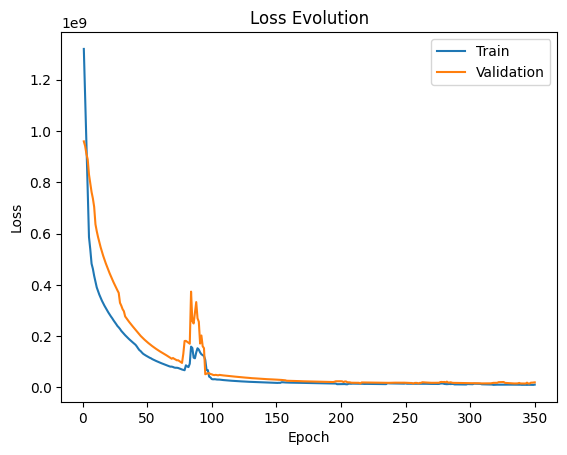

Accuracy: 3139.002


In [20]:
# define model
import tensorflow as tf

model = Sequential()
# the input shape is (n_steps, X_train.shape[2]) = (5, 1).
# the LSTM requires 3D input, so we add a new dimension.
model.add(LSTM(33, activation='relu', kernel_initializer='he_normal', 
               input_shape=(n_steps,X_train.shape[2])))
model.add(Dense(units=65, 
                activation='relu', 
                kernel_initializer='he_normal', 
                kernel_regularizer=tf.keras.regularizers.L1(0.000344),
                activity_regularizer=tf.keras.regularizers.L2(0.0092)))
model.add(Dense(1))

# compile the model
# 'mse': it is more a regression problem, so we use mse. 
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

from keras.callbacks import History  # Import History callback

# fit the model
history = History()
model.fit(X_train, y_train, epochs=350, batch_size=32, 
          verbose=2, validation_data=(X_test, y_test), callbacks=[history],)

# evaluate the model (optional)
# Get the recorded loss values from history
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the loss values
ax.plot(range(1, len(loss_values) + 1), loss_values)
ax.plot(range(1, len(val_loss_values) + 1), val_loss_values)
plt.legend(['Train', 'Validation'], loc='upper right')

# Set the plot title and labels
ax.set_title('Loss Evolution')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Show the plot
plt.show()

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

## Predicrt one next day

In [21]:
# evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

# make a prediction
row = asarray([18024.0, 16722.0, 14385.0, 21342.0, 17180.0]).reshape((1, n_steps, 1)) # the input size and shape must match the training data (X_train)
yhat = model.predict(row)
print('Predicted: %.3f' % (yhat))



MSE: 19860794.000, RMSE: 4456.545, MAE: 3139.002
1/1 [==============================] - 0s 352ms/step
Predicted: 13802.126


C:\Users\kinla\AppData\Local\Temp\ipykernel_7092\2454137217.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted: %.3f' % (yhat))


## Predict n next days

In [22]:
yhat2 = model.predict(X_test)
print(yhat2) # total 12 predicted values 

1/1 [==============================] - 0s 34ms/step
[[11076.969]
 [13158.893]
 [14242.642]
 [20411.387]
 [19801.982]
 [23679.021]
 [17527.975]
 [16985.406]
 [16826.998]
 [12886.37 ]
 [23088.943]
 [13802.127]]


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# assuming y_train and yhat2 are numpy arrays and df is a DataFrame object
y_train = y_train.tolist()

# flatten yhat2 values
yhat2 = [item for sublist in yhat2 for item in sublist]

# get the x_values for each part
# `n_steps = 5` (context window was 5)
x_values_train = df.index[-(len(y_train) + len(yhat2)):-len(yhat2)] # get the another last 91 items 
x_values_pred = df.index[-len(yhat2):] # get the last 12 itesm from df.index

# create DataFrames
df_train = pd.DataFrame(y_train, index=x_values_train, columns=['Y'])
df_pred = pd.DataFrame(yhat2, index=x_values_pred, columns=['Y'])

print(df_train)
print(df_pred)

                  Y
Month              
1960-06-01  13791.0
1960-07-01   9498.0
1960-08-01   8251.0
1960-09-01   7049.0
1960-10-01   9545.0
...             ...
1967-08-01  13434.0
1967-09-01  13598.0
1967-10-01  17187.0
1967-11-01  16119.0
1967-12-01  13713.0

[91 rows x 1 columns]
                       Y
Month                   
1968-01-01  11076.968750
1968-02-01  13158.892578
1968-03-01  14242.641602
1968-04-01  20411.386719
1968-05-01  19801.982422
1968-06-01  23679.021484
1968-07-01  17527.974609
1968-08-01  16985.406250
1968-09-01  16826.998047
1968-10-01  12886.370117
1968-11-01  23088.943359
1968-12-01  13802.126953


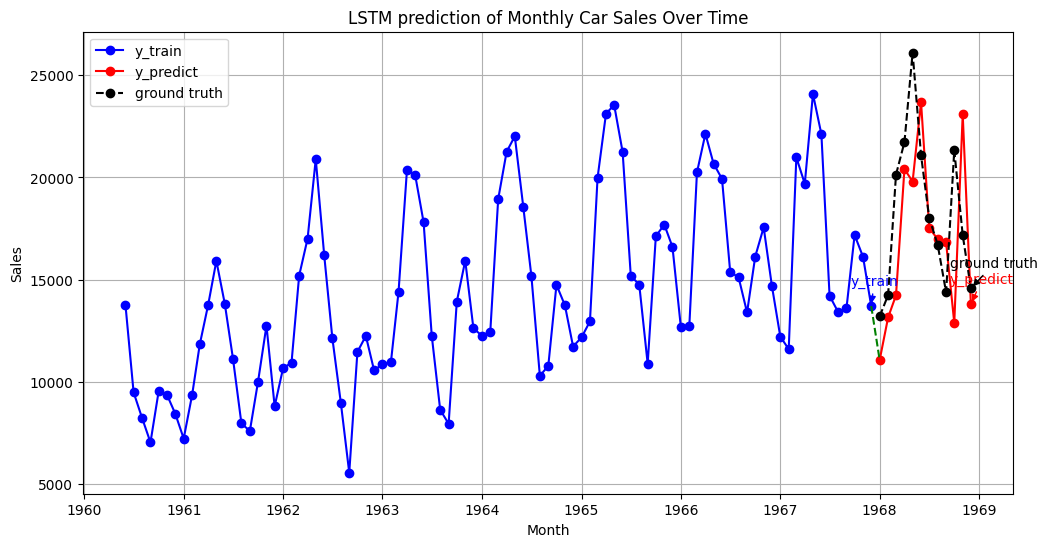

In [24]:
# Plotting
plt.figure(figsize=(12, 6))

# plot y_train
plt.plot(df_train.index, df_train.values, color='b', label='y_train', marker='o', linestyle='-')

# plot yhat2
plt.plot(df_pred.index, df_pred.values, color='r', label='y_predict', marker='o', linestyle='-')

# plot connection between last y_train and first y_predict
plt.plot([df_train.index[-1], df_pred.index[0]], [df_train.values[-1], df_pred.values[0]], color='g', linestyle='--')

# plot df in black dotted line
plt.plot(df.index[-len(yhat2):], df.values[-len(yhat2):], color='k', label='ground truth', marker='o', linestyle='--')

# annotations
plt.annotate('y_train', xy=(df_train.index[-1], df_train.values[-1]), xytext=(-15,15), 
             textcoords='offset points', color='b', arrowprops=dict(arrowstyle='-|>', color='b'))

plt.annotate('y_predict', xy=(df_pred.index[-1], df_pred.values[-1]), xytext=(-15,15), 
             textcoords='offset points', color='r', arrowprops=dict(arrowstyle='-|>', color='r'))

plt.annotate('ground truth', xy=(df.index[-1], df.values[-1]), xytext=(-15,15), 
             textcoords='offset points', color='k', arrowprops=dict(arrowstyle='-|>', color='k'))


plt.title('LSTM prediction of Monthly Car Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()